In [2]:
'''----------------------------------------------IMPORT ------------------------------------------------------'''
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 17}) #Set font size
'''----------------------------------------------SET DATA PATHS ---------------------------------------------------- '''

data_path_butler = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_BCC Trailhead Data_Time series_butler.csv'
data_path_griz = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_LCC Trailhead Data_Time series_Griz.csv'
data_path_wp = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_LCC Trailhead Data_Time series_WhitePine.csv'

'''----------------------------------------------LOAD DATA ---------------------------------------------------- '''
data_butler = pd.read_csv(data_path_butler)
data_griz = pd.read_csv(data_path_griz)
data_wp = pd.read_csv(data_path_wp)

### Cleaning the data
Here we have to clean the data due to the signs throwing false positives. Since it is believed that the false positives are due to the signs shaking, the nocturnal maximum is removed from each daily total series.  

In [3]:

# Set the date index
data_butler['Converted Datetime'] = pd.DatetimeIndex(data_butler['Converted Datetime'])
data_butler = data_butler.set_index('Converted Datetime')

data_griz['Converted_Date'] = pd.DatetimeIndex(data_griz['Converted_Date'])
data_griz = data_griz.set_index('Converted_Date')

data_wp['Converted_datetime'] = pd.DatetimeIndex(data_wp['Converted_datetime'])
data_wp = data_wp.set_index('Converted_datetime')

# Calculate the max value at night
dnight_butler = data_butler.between_time('0:00:00', '6:00:00')
dnight_griz = data_griz.between_time('0:00:00', '6:00:00')
dnight_wp = data_wp.between_time('0:00:00', '6:00:00')

dmax_butler = dnight_butler.resample('D').max()
dmax_griz = dnight_griz.resample('D').max()
dmax_wp = dnight_wp.resample('D').max()

# Calculate the total people per data and subtract the max night value to adjust for sign shaking
dtot_butler = data_butler.resample('D').sum()
dfinal_butler = dtot_butler - dmax_butler

dtot_griz= data_griz.resample('D').sum()
dfinal_griz = dtot_griz - dmax_griz

dtot_wp = data_wp.resample('D').sum()
dfinal_wp = dtot_wp - dmax_wp


(0.0, 230.0)

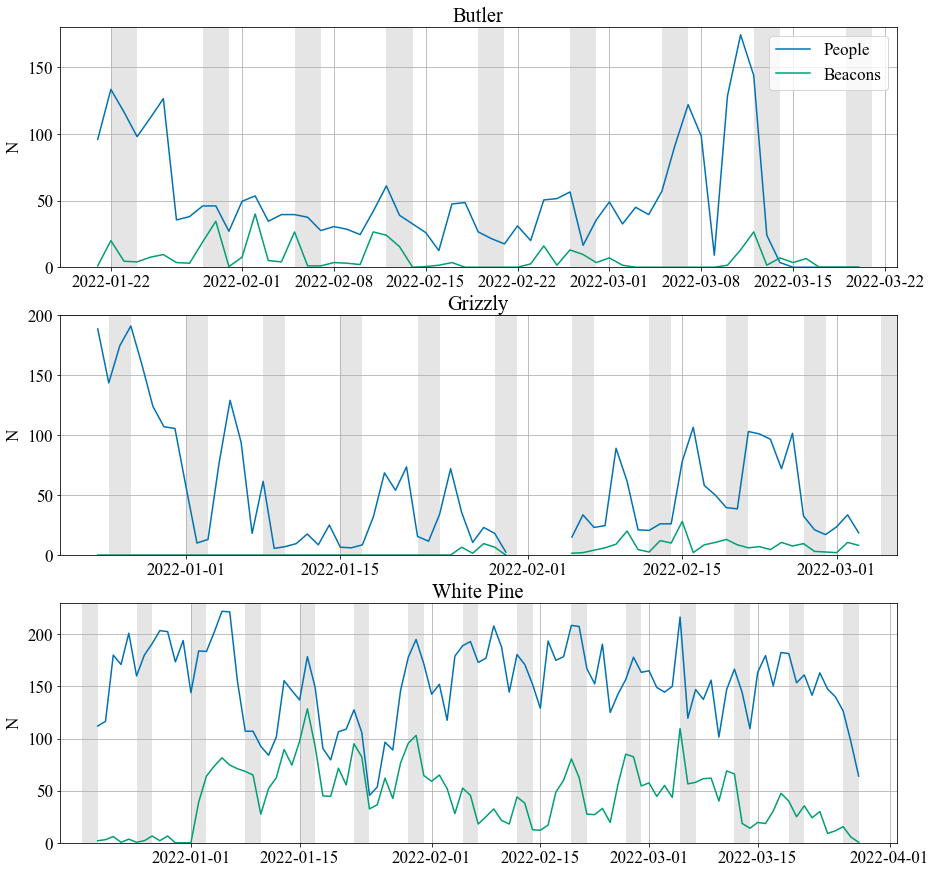

In [15]:
# Plot the time series for the article
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(dfinal_butler['People'][:60]/2,label = "People")
axs[0].plot(dfinal_butler['Beacons'][:60]/2,label = "Beacons")
axs[0].grid()
axs[0].title.set_text('Butler')
axs[0].legend()
axs[0].set_ylabel('N')

# Highlight weekends based on the x-axis units
xmin, xmax = axs[0].get_xlim()
days = np.arange(np.floor(xmin), np.ceil(xmax)+2)
weekends = [(dt.weekday()>=5)|(dt.weekday()==0) for dt in mdates.num2date(days)]
axs[0].fill_between(days, *axs[0].get_ylim(), where=weekends, facecolor='k', alpha=.1)
axs[0].set_xlim(xmin, xmax) # set limits back to default values
axs[0].set_ylim([0,180])


axs[1].plot(dfinal_griz['People']/2)
axs[1].plot(dfinal_griz['Beacons']/2)
axs[1].title.set_text('Grizzly')
axs[1].grid()
axs[1].set_ylabel('N')

# Highlight weekends based on the x-axis units
xmin, xmax = axs[1].get_xlim()
days = np.arange(np.floor(xmin), np.ceil(xmax)+2)
weekends = [(dt.weekday()>=5)|(dt.weekday()==0) for dt in mdates.num2date(days)]
axs[1].fill_between(days, *axs[1].get_ylim(), where=weekends, facecolor='k', alpha=.1)
axs[1].set_xlim(xmin, xmax) # set limits back to default values
axs[1].set_ylim([0,200])

axs[2].plot(dfinal_wp['People'][:110]/2)
axs[2].plot(dfinal_wp['Beacons'][:110]/2)
axs[2].grid()
axs[2].title.set_text('White Pine')
axs[2].set_ylabel('N')

# Highlight weekends based on the x-axis units
xmin, xmax = axs[2].get_xlim()
days = np.arange(np.floor(xmin), np.ceil(xmax)+2)
weekends = [(dt.weekday()>=5)|(dt.weekday()==0) for dt in mdates.num2date(days)]
axs[2].fill_between(days, *axs[2].get_ylim(), where=weekends, facecolor='k', alpha=.1)
axs[2].set_xlim(xmin, xmax) # set limits back to default values
axs[2].set_ylim([0,230])




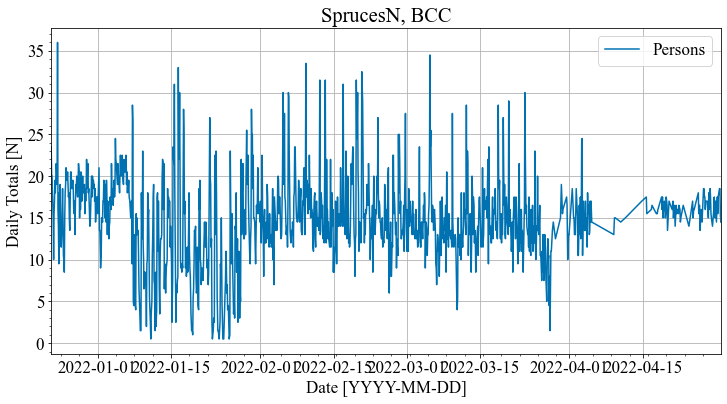

In [12]:


plt.figure(figsize=(12, 6))
plt.plot(data_wp['People'][40:]/2)
#plt.plot(dtot['Beacons'][40:]/2)
plt.ylabel('Daily Totals [N]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')

plt.legend(['Persons','Becaons']) # legend in upper left side
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_People_Beacons' +'.pdf', bbox_inches='tight')

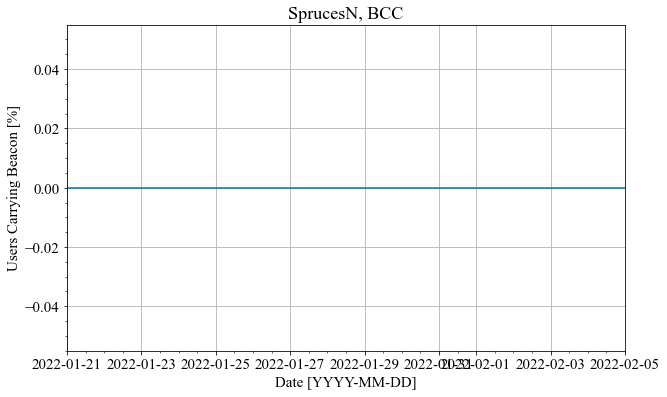

In [53]:
plt.figure(figsize=(10, 6))

plt.plot((dtot['Beacons'][:]/dfinal['People'][:55])*100)
plt.ylabel('Users Carrying Beacon [%]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_Beacons_Percent' +'.pdf', bbox_inches='tight')

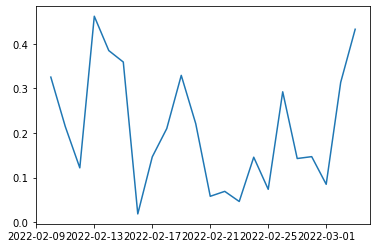

In [109]:
plt.figure()
plt.plot(dtot['Beacons'][50:100]/dfinal['People'][50:100])
plt.show()